# <center>Digital Image Processing - Problem Set 6</center>

### Student Names:

* Karolay Ardila Salazar
* Julián Elías Sibaja García
* Andrés Simancas Mateus

### Problem 1

Write a function that performs object recognition using $k$-Nearest Neighbors ($k$-NN). You can (and are encouraged to) use the functions
you have written for previous exercises. Your function should run the following steps:

1. Binarize the images in the training set. Use an appropriate threshold when binarizing each image. You can use an adaptive thresholding technique. Perform binarization such that pixels on the object of interest are equal to 1 and background pixels are equal to 0.
2. Describe each object in the training set using Hu moments. This results in one feature vector per object.
3. Repeat the two previous steps for the all images in the training set.
4. The $k$-NN classifier predicts a category for each testing example according to the following steps:
    1. Pick an image from the testing set.
    2. Compute the distance from the feature vector associated to the testing example to all the descriptors from the training set.
    3. Select the closest $k$ training examples (that is, the $k$ training examples with shortest distance to our testing image).
    4. Find the object category associated to each of the $k$ training examples. This information is given to you in the training set.
    5. Assign a label to the testing image. The assigned label is equal to the most common label among the $k$ closes training examples.
    
5. Repeat this process for all testing examples. Compute the accuracy of the classifier in terms of the number of correctly classified testing examples over the total number of examples in the testing set.

You should test your functions with the three object classes <tt> key, chip, pen</tt>. Compare the difference in performance between a 1-NN classifier, a 3-NN classifier and a $k$-NN classifier. Summarize the performance of each classifier using confusion matrices.

CONFUSION MATRICES AT THE END

KNN with k = 1
-----------------------------------
Class of file key_00.jpg is CHIP
-----------------------------------
Class of file chip_02.jpg is CHIP
-----------------------------------
Class of file chip_01.jpg is KEY
-----------------------------------
Class of file pen_00.jpg is PEN
-----------------------------------
Class of file pen_01.jpg is PEN
-----------------------------------
Class of file chip_00.jpg is CHIP
-----------------------------------
Class of file key_02.jpg is PEN
-----------------------------------
Class of file key_03.jpg is KEY
-----------------------------------
Class of file key_01.jpg is KEY
-----------------------------------
Class of file chip_03.jpg is KEY

KNN with k = 3
-----------------------------------
Class of file key_00.jpg is CHIP
-----------------------------------
Class of file chip_02.jpg is CHIP
-----------------------------------
Class of file chip_01.jpg is KEY
-----------------------------------
Class o

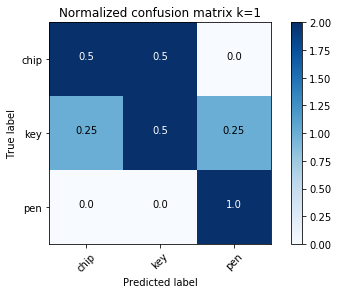

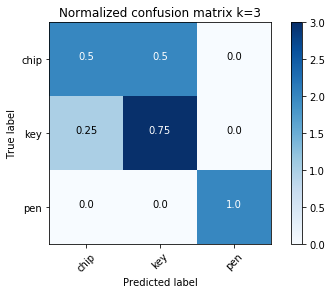

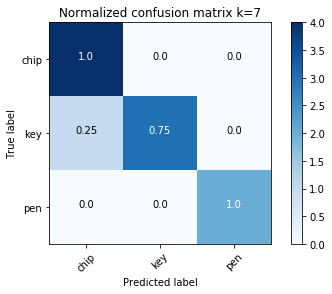

In [116]:
import numpy as np
import cv2
import itertools
import matplotlib.pyplot as mplt

from os import listdir
from os.path import isfile, join
from sklearn.metrics import confusion_matrix
%matplotlib inline

TRAIN_PATH = 'training_set/'
TEST_PATH = 'testing_set/'

LABELS = {'key': 0, 'chip': 1, 'pen': 2}
INV_LABELS = {0: 'key', 1: 'chip', 2: 'pen'}

N = 7
TEST_K = [1, 3, N]

def rg(img_path):
    return cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

def normalThresholding(img):
    _, th = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY_INV)
    return th

def huMoments(image):
    Hu = cv2.HuMoments(cv2.moments(image)).flatten()
    return Hu
        
def classify(test, knn, k):
    test_vec = np.array(test, dtype=np.float32).reshape([1, len(test)])
    _, results, _, _ = knn.find_nearest(test_vec, k)
    
    return int(results[0][0])

def printToConsole(header, files, classes):
    files = [f.split('/')[1] for f in files]
    
    print(header)
    for i in range(len(files)):
        print('-'*(14 + 12 + 4 + 5))
        print('Class of file ' + files[i] + ' is ' + classes[i].upper())
    print('')
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=mplt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    mplt.imshow(cm, interpolation='nearest', cmap=cmap)
    mplt.title(title)
    mplt.colorbar()
    tick_marks = np.arange(len(classes))
    mplt.xticks(tick_marks, classes, rotation=45)
    mplt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 4.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        mplt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    mplt.tight_layout()
    mplt.ylabel('True label')
    mplt.xlabel('Predicted label')

        

# ************************
#        TRAINING
# ************************
        
# Load the training images
train_files = [join(TRAIN_PATH, f) for f in listdir(TRAIN_PATH) if isfile(join(TRAIN_PATH, f))]
train_imgs = [rg(f) for f in train_files]

# Assign labels
train_labels = [(i.split('/')[1]).split('_')[0] for i in train_files]
labels = [LABELS[l] for l in train_labels]

# Smooth the images
train_imgs = [cv2.GaussianBlur(i, (9,9), 0) for i in train_imgs]

# Threshold the training images
th_train_imgs = [normalThresholding(i) for i in train_imgs]

# Extract Hu moments
hu_train_imgs = [huMoments(i) for i in th_train_imgs]

# Train the classifier
knn = cv2.KNearest()
knn.train(np.array(hu_train_imgs, dtype=np.float32), np.array(labels))

# ************************
#         TESTING
# ************************

# Load testing images
test_files = [join(TEST_PATH, f) for f in listdir(TEST_PATH) if isfile(join(TEST_PATH, f))]
test_imgs = [rg(f) for f in test_files]

# Smooth the images
test_imgs = [cv2.GaussianBlur(i, (9,9), 0) for i in test_imgs]

# Threshold the testing images
th_test_imgs = [normalThresholding(i) for i in test_imgs]

# Extract Hu moments
hu_test_imgs = [huMoments(i) for i in th_test_imgs]

# Classify testing images
all_tests = list()
for i in TEST_K:
    classes = [classify(hu, knn, i) for hu in hu_test_imgs]
    classes_str = [INV_LABELS[j] for j in classes]
    all_tests.append(classes_str)
    #printToConsole('KNN with k = ' + str(i), test_files, classes)
    
# *************************************
#    CONFUSION MATRICES AND PRINTING
# *************************************
true_label_of_tests = [(i.split('/')[1]).split('_')[0] for i in test_files]

print('CONFUSION MATRICES AT THE END')
print('')
for i in range(len(TEST_K)):
    mplt.figure()
    cnf = confusion_matrix(true_label_of_tests, all_tests[i])
    plot_confusion_matrix(cnf, classes=['chip', 'key', 'pen'], normalize=True,
                      title='Normalized confusion matrix k=' + str(TEST_K[i]))
    printToConsole('KNN with k = ' + str(TEST_K[i]), test_files, all_tests[i])
mplt.show()

